In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from matplotlib import pyplot as plt
from astropy.table import Table, vstack, unique, hstack, join
import astropy.units as u
from astropy.coordinates import SkyCoord
import pandas as pd
from pyslime.pipeline import interpolate, catalogs


datadir = "/Volumes/GoogleDrive/My Drive/SlimeMold/2021-11-23-VACv2/"
packagedir = "/Users/mwilde/python/pyslime/pyslime/data/"
dropboxdir = "/Users/mwilde/Dropbox/slime-mold/data/final_data/"
pipedatadir = "/Users/mwilde/python/pyslime/pyslime/pipeline/data/"


In [9]:
firefly = Table.read('/Users/mwilde/Dropbox/slime-mold/sdss_eboss_firefly-dr14.fits')
sdss = Table.read('/Users/mwilde/Dropbox/Research/data/SDSS/nasaSloan/nsa_v1_0_1.fits')
# vac = Table.read("slimeMold_galaxy_catalog_v1_0_0.fits")

Make subtable of the survey files

In [35]:
def make_subtable(survey, surveyname='firefly'):
    firefly = survey
    catid_list = []
    for plate, mjd, fiberid in zip(firefly['PLATE'], firefly['MJD'], firefly['FIBERID']):
        catid_list.append(str(plate)+str(mjd)+str(fiberid))

    firefly['CATALOGID'] = catid_list

    t = Table()
    t['catalogID'] = firefly['CATALOGID']
    # t['specobjID'] = firefly['SPECOBJID']
    t['PLATE'] = firefly['PLATE']
    t['MJD'] = firefly['MJD']
    t['FIBERID'] = firefly['FIBERID']
    t['RA'] = firefly['PLUG_RA']*u.deg
    t['Dec'] = firefly['PLUG_DEC']*u.deg
    #t['RA'] = firefly['RA']*u.deg
    #t['Dec'] = firefly['DEC']*u.deg
    t['z'] = firefly['Z']
    # t['MSTARS'] = firefly['Chabrier_MILES_stellar_mass'] * u.solMass
    # t['MSTARS_Err'] = firefly['Chabrier_MILES_stellar_mass_up']*u.solMass - firefly['Chabrier_MILES_stellar_mass_low']* u.solMass
    t['mass_source'] = surveyname
    # t['slimedens'] = np.zeros(len(firefly), dtype=np.float32)
    # t['matterdens'] = np.zeros(len(firefly), dtype=np.float32)
    return t

def make_out_table(match, surveyname):

    out = Table()
    out['catalogID'] = match['catalogID']
    out['PLATE'] = match['PLATE']
    out['MJD'] = match['MJD']
    out['FIBERID'] = match['FIBERID']
    out['RA'] = match['ra']
    out['DEC'] = match['dec']
    out['Z'] = match['z_1']
    out['MASS_SOURCE'] = surveyname
    out['MCPM_RUN'] = match['MCPM_RUN']
    out['MSTARS'] = match['mstars']
    out['MATTERDENS'] = match['log10_overdens']
    
    return out

In [26]:
ffly = make_subtable(firefly)
nsa = make_subtable(sdss, surveyname='nsa')

In [27]:
prevac = pd.read_csv(datadir + "prevac_catalog.csv")

In [28]:
nsa

catalogID,PLATE,MJD,FIBERID,RA,Dec,z,mass_source
,,,,deg,deg,,
str13,int32,int32,int16,float64,float64,float32,str3
266516301,266,51630,1,146.71421,-1.0413043,0.021222278,nsa
266516304,266,51630,4,146.62857,-0.76513683,0.06465632,nsa
266516306,266,51630,6,146.63167,-0.98827781,0.05265425,nsa
2665163011,266,51630,11,146.9341,-0.67040397,0.121270485,nsa
2665163012,266,51630,12,146.9639,-0.54500256,0.055980586,nsa
2665163013,266,51630,13,146.9635,-0.75935173,0.09708638,nsa
2665163016,266,51630,16,146.85983,-0.80890165,0.12658988,nsa
2665163017,266,51630,17,146.59272,-0.76025604,0.064959235,nsa


In [16]:
prevac_sdss = prevac.loc[prevac.MCPM_RUN == 0]
set(prevac_sdss.MCPM_RUN)

{0}

In [17]:
prevac_lrg = prevac.loc[prevac.MCPM_RUN != 0]
set(prevac_lrg.MCPM_RUN)

{1, 2, 3, 4, 5, 6, 7, 8}

In [34]:
sdss_nsa_match = catalogs.xmatch(prevac_sdss, nsa, 'ra', 'dec', 'RA', 'Dec', max_sep=3*u.arcsec)
lrg_firefly_match = catalogs.xmatch(prevac_lrg, ffly, 'ra', 'dec', 'RA', 'Dec', max_sep=3*u.arcsec)

In [36]:
sdss_out = make_out_table(sdss_nsa_match, 'nsa')
lrg_out = make_out_table(lrg_firefly_match, 'firefly')

In [37]:
vac = vstack([sdss_out, lrg_out])

In [38]:
vac

catalogID,PLATE,MJD,FIBERID,RA,DEC,Z,MASS_SOURCE,MCPM_RUN,MSTARS,MATTERDENS
str13,int32,int32,int32,float64,float64,float64,str7,int64,float64,float64
26651630147,266,51630,147,146.29986258871986,-0.1200040329025857,0.0307035073637962,nsa,0,10.425012588500977,1.4974101982551054
266516301,266,51630,1,146.714215072841,-1.041280023331374,0.0212222784757614,nsa,0,10.172930717468262,1.7854924651609645
2665163012,266,51630,12,146.9634997327016,-0.5447758299302171,0.0559805855154991,nsa,0,10.0126314163208,0.8528137300060619
2665163069,266,51630,69,146.8915925363065,-0.5126719548057409,0.0838929116725921,nsa,0,10.379660606384276,0.7225824347940721
2665163083,266,51630,83,146.0937040634269,-0.793110365699979,0.0675851702690124,nsa,0,10.851116180419922,0.986762363711348
26651630373,266,51630,373,145.79337611029078,1.185684949627377,0.0625668168067932,nsa,0,10.55429744720459,0.4950216427713998
2665163078,266,51630,78,146.7560335057309,-0.1682299117202801,0.0624499060213565,nsa,0,9.977581024169922,1.0925519480913797
26651630412,266,51630,412,145.96965802752655,0.8309221318276753,0.0363569483160972,nsa,0,10.113277435302734,1.6081439874267558
26651630221,266,51630,221,145.7447381357765,-0.0763446750654876,0.0625913590192794,nsa,0,10.186309814453123,1.1111012220152576


In [39]:
vac['catalogID'] = vac['catalogID'].astype(np.int64)
vac['Z'] = vac['Z'].astype(np.float32)
vac['MSTARS'] = vac['MSTARS'].astype(np.float32)
vac['MATTERDENS'] = vac['MATTERDENS'].astype(np.float32)
vac['MCPM_RUN'] = vac['MCPM_RUN'].astype(np.int16)

# duplicates in data 
    CATALOGID MCPM_RUN n
    177153498340 3 2
    641156331589 7 2
    213353917535 0 2
    577756280586 3 2
    640456330845 7 2
    180653559566 3 2
    105252466330 3 2
    501555707562 7 2
    614856209138 6 2
    529055862902 5 2
    104052722133 3 2
    645156358918 7 2
    577756280586 5 2
    462155649774 0 2
    511155840994 4 2
    208653401599 5 2
    105252466487 7 2
    19585338552 7 2
    673356369176 3 2
    640956306506 5 2
    193553387630 3 2
    119052670393 0 2

This has been fixed. See `fixVACdups-Matt-Version.ipynb` from the dropbox folder. Basically had to check against sdss explorer

In [42]:
dropboxdir

'/Users/mwilde/Dropbox/slime-mold/data/final_data/'

In [43]:
bigtab = Table.read(pipedatadir+"mattPlusJoeVACfixes_2021aug13.fits")

# Need to change the plate mjd fiberid to be the correct ones. Using the other notebook we have made a table with the corrected ID, MJD, FIBER and PLATE. Going to delete the old rows from the table and then add the new table to the existing vac table

In [44]:
bigtab

catalogID,PLATE,MJD,FIBERID,RA,DEC,Z,MASS_SOURCE,MCPM_RUN,MSTARS,MATTERDENS,newPLATE,newMJD,newFIBERID,newCatalogID
int64,int32,int32,int32,float64,float64,float32,bytes7,int16,float32,float32,int32,int32,int32,bytes12
177153498340,1771,53498,340,193.98322052475862,15.611756438108605,0.23107594,firefly,3,370240230000.0,1.093062,1771,53498,340,177153498340
177153498340,1771,53498,340,193.98311488759748,15.61101724996214,0.23136464,firefly,3,20690964000.0,1.0815413,5416,56002,664,541656002664
641156331589,6411,56331,589,177.2034148263425,27.40079044754272,0.40935633,firefly,7,258165340000.0,1.3436651,6411,56331,589,641156331589
641156331589,6411,56331,589,177.2032561239011,27.400088961102654,0.41000712,firefly,7,153704000000.0,1.2402749,6406,56330,86,64065633086
213353917535,2133,53917,535,217.8585645324488,30.947611697612587,0.012526643,nsa,0,173135140.0,0.7463092,2133,53917,535,213353917535
577756280586,5777,56280,586,138.48911802501522,26.69391613360936,0.2963859,firefly,3,39468937000.0,1.0299807,5779,56338,128,577956338128
577756280586,5777,56280,586,138.488464250603,26.693805780321483,0.29648113,firefly,3,127700980000.0,1.0299807,5777,56280,586,577756280586
640456330845,6404,56330,845,179.4086811383486,24.53147626009242,0.42155218,firefly,7,135652460000.0,1.2439997,6404,56330,845,640456330845
640456330845,6404,56330,845,179.40942624345854,24.53114030120635,0.42717534,firefly,7,533522840000.0,1.2346877,2514,53882,30,25145388230


In [45]:
bad_catid = list(bigtab['catalogID'])

bad_rows = []
bad_rows_idx = []
for idx, row in enumerate(vac):
    # print(row['catalogID'])
    if row['catalogID'] in bad_catid:
        # print(int(row['catalogID']))
        
        bad_rows.append(int(row['catalogID']))
        bad_rows_idx.append(idx)

In [46]:
vac_copy = vac.copy()

In [47]:
vac_copy.remove_rows(bad_rows_idx)

In [48]:
bigtab['catalogID'] = bigtab['newCatalogID'].astype(np.int64)
bigtab['PLATE'] = bigtab['newPLATE'].astype(np.int32)
bigtab['MJD'] = bigtab['newMJD'].astype(np.int32)
bigtab['FIBERID'] = bigtab['newFIBERID'].astype(np.int32)
bigtab.remove_columns(['newCatalogID', 'newPLATE', 'newMJD', 'newFIBERID'])

In [61]:
new = vstack([vac_copy, bigtab])
unique(new, keys=['catalogID', 'MCPM_RUN'])

catalogID,PLATE,MJD,FIBERID,RA,DEC,Z,MASS_SOURCE,MCPM_RUN,MSTARS,MATTERDENS
int64,int32,int32,int32,float64,float64,float32,str7,int16,float32,float32
266516301,266,51630,1,146.714215072841,-1.041280023331374,0.021222278,nsa,0,10.172931,1.7854924
266516304,266,51630,4,146.6285851269414,-0.7651620976591762,0.06465632,nsa,0,10.422385,1.0360718
266516306,266,51630,6,146.63170644325592,-0.9883467023053,0.05265425,nsa,0,9.590905,0.20140773
267516081,267,51608,1,148.5986570382982,-0.732304702032923,0.046558477,nsa,0,9.789456,0.117286995
267516083,267,51608,3,148.66692099287746,-0.8990926923412219,0.09342866,nsa,0,10.972907,1.0998263
267516084,267,51608,4,148.57361751585952,-0.8990203656104311,0.08971591,nsa,0,10.363775,0.59949815
267516088,267,51608,8,148.73292302938592,-0.7611534482007497,0.086271614,nsa,0,10.973039,0.956878
268516331,268,51633,1,150.06979451633774,-0.974504601265458,0.068742365,nsa,0,9.341592,0.39141583
268516336,268,51633,6,149.99904738462055,-0.8691536729580291,0.07604031,nsa,0,11.139628,1.0693128


In [51]:
new.write('/Users/mwilde/Desktop/eboss_mcpm_vac_v0.4.fits', overwrite=True)
new.write(pipedatadir+'slimeMold_galaxy_catalog_v1_0_0.fits', overwrite=True)
new.write('/Users/mwilde/Desktop/slimeMold_galaxy_catalog_v1_0_0.fits', overwrite=True)

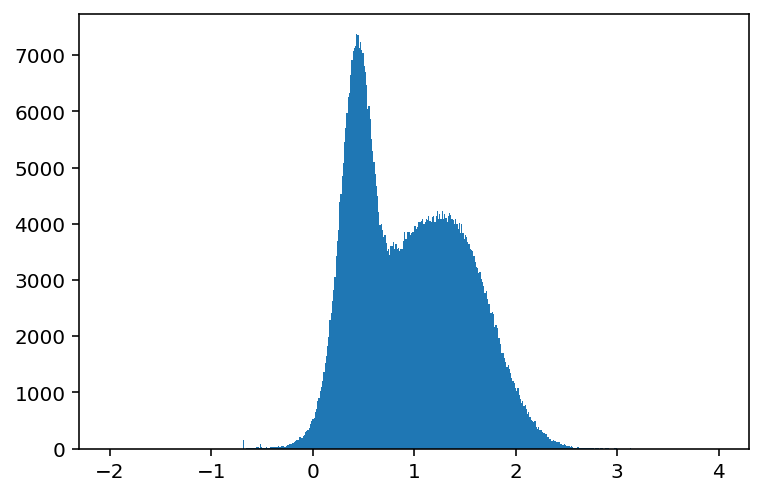

In [62]:
bins = np.linspace(-2, 4, 500)
plt.hist(new['MATTERDENS'], bins=bins);

# make a version for sql with ints for mass source

In [63]:
m = new['MASS_SOURCE']
new['MASS_SOURCE'] = np.where(m == 'nsa', 2, 1).astype(np.int8)

In [64]:
oldcolnames = ['catalogID','PLATE','MJD','FIBERID','RA','DEC','Z','MSTARS','MASS_SOURCE','MATTERDENS','MCPM_RUN']
newcolnames = ['catalogID',
'plate',
'mjd',    
'fiberid',   
'ra',  
'dec',       
'z',      
'mstars',    
'massSource',
'matterDens',
'mcpmRun']
new.rename_columns(oldcolnames, newcolnames)
new.write(datadir+'ebossMCPM.fits', overwrite=True)
new.write('/Users/mwilde/Desktop/ebossMCPM.fits', overwrite=True)